In [53]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import classical_part, utilities
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
historiesH1 = []
test_accuraciesH1 = []
historiesH2 = []
test_accuraciesH2 = []
for i in range(0, 2):
    x_train, xq_train, y_train, x_val, xq_val, y_val, x_test, xq_test, y_test = classical_part.load_mnist(6, 2, 2)
    
    
    cmodel = classical_part.classical_model()
    cmodel.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    H1 = cmodel.fit(x_train, y_train, validation_data=(x_val, y_val),
            batch_size=1, epochs=30, verbose=0)
    
    historiesH1.append(H1.history)
    _, test_accuracy = cmodel.evaluate(x_test, y_test)
    test_accuraciesH1.append(test_accuracy)

    
    hmodel = classical_part.hybrid_model()
    hmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    H2 = hmodel.fit(xq_train, y_train, validation_data=(xq_val, y_val),
          batch_size=4, epochs=30, verbose=0)
    historiesH2.append(H2.history)
    _, test_accuracy = hmodel.evaluate(xq_test, y_test)
    test_accuraciesH2.append(test_accuracy)
    

    hmodel1 = classical_part.hybrid_model()
    hmodel1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    H3 = hmodel1.fit(x_train, y_train, validation_data=(x_val, y_val),
          batch_size=4, epochs=30, verbose=0)
    historiesH3 = []
    test_accuraciesH3 = []
    historiesH3.append(H3.history)
    _, test_accuracy = hmodel1.evaluate(x_test, y_test)
    test_accuraciesH3.append(test_accuracy)

utilities.save_history_train('./exps', 'h1', historiesH1)
np.savetxt('exps/h1test.txt', test_accuraciesH1)
utilities.save_history_train('./exps', 'h2', historiesH2)
np.savetxt('exps/h2test.txt', test_accuraciesH2)
utilities.save_history_train('./exps', 'h3', historiesH3)
np.savetxt('exps/h3test.txt', test_accuraciesH3)

1/1 [==============================] - 0s 34ms/step - loss: 82.1281 - accuracy: 0.5000


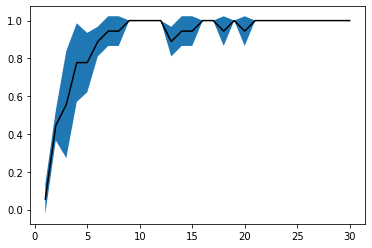

In [64]:
accs = np.asarray(np.loadtxt('exps/h1history_accuracy.txt'))
print()
plt.plot(range(1, 31), np.mean(accs, axis = 0), 'k-')
plt.fill_between(range(1, 31), np.mean(accs, axis = 0) - np.std(accs, axis = 0), np.mean(accs, axis = 0) + np.std(accs, axis = 0))

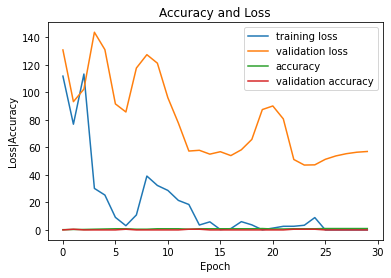

In [36]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 30
plt.plot(np.arange(0, numOfEpoch), H1.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H1.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H1.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H1.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

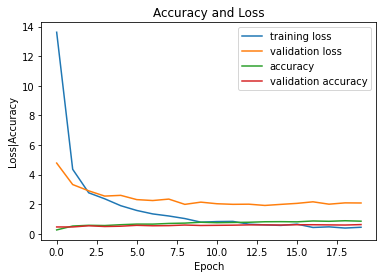

In [70]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 20
plt.plot(np.arange(0, numOfEpoch), H3.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H3.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H3.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H3.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [48]:
H1.history['loss']
np.savetxt('h1history.txt', H1.history['loss'])

In [71]:
H1.history['loss']

[34.11978530883789,
 7.173458576202393,
 3.9349591732025146,
 2.6489593982696533,
 2.1377975940704346,
 1.662938117980957,
 1.464540958404541,
 1.247038722038269,
 1.1636286973953247,
 1.1605831384658813,
 0.8829148411750793,
 0.7726955413818359,
 0.7834202647209167,
 0.7483595609664917,
 0.6675376296043396,
 0.5309522151947021,
 0.5380055904388428,
 0.5952585935592651,
 0.37286990880966187,
 0.3855118751525879]

In [72]:
H2.history['loss']

[2.3723416328430176,
 2.1769156455993652,
 2.0804860591888428,
 1.9888917207717896,
 1.9128963947296143,
 1.8452332019805908,
 1.7650926113128662,
 1.6856759786605835,
 1.616266131401062,
 1.5889724493026733]